## Analysis and comparisons

Number of price outliers: 0


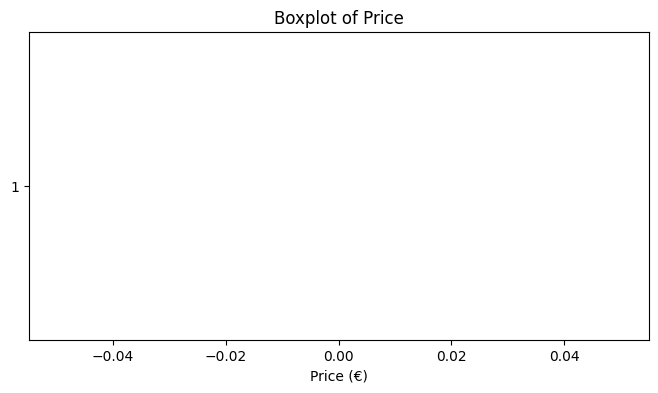

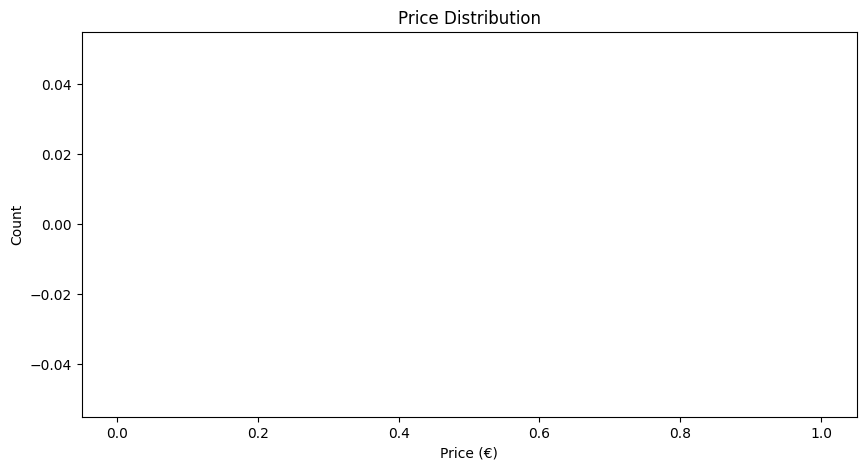

region
brussels   NaN
flanders   NaN
unknown    NaN
wallonia   NaN
Name: price, dtype: float64

In [16]:
import matplotlib.pyplot as plt
# Ensure price is numeric

df["price"] = pd.to_numeric(df["price"], errors="coerce")

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]

print("Number of price outliers:", len(outliers))
outliers.head()

plt.figure(figsize=(8,4))
plt.boxplot(df["price"].dropna(), vert=False)
plt.title("Boxplot of Price")
plt.xlabel("Price (€)")
plt.show()


#Identify outliers visually using a histogram

plt.figure(figsize=(10,5))
plt.hist(df["price"].dropna(), bins=60)
plt.title("Price Distribution")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.show()

# separate for outliers



# Extract outliers into a separate DataFrame
price_outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]

# Show number of outliers
#print("Number of price outliers:", len(price_outliers))

# Display the first few outliers
#price_outliers.head()



#correlation
df.corr(numeric_only=True)["price"].sort_values(ascending=False)   # correlation of Price

# add regions
def postal_to_region(code):
    if pd.isna(code):
        return "unknown"
    if 1000 <= code <= 1299:
        return "brussels"
    if (1300 <= code <= 1499) or (4000 <= code <= 7999):
        return "wallonia"
    if (1500 <= code <= 3990) or (8000 <= code <= 9992):
        return "flanders"
    return "unknown"
    
df["region"] = df["postal_code"].apply(postal_to_region)
price_outliers
df.groupby("region")["price"].median()
#df.isna().sum()



## data distributions


# global price distribution


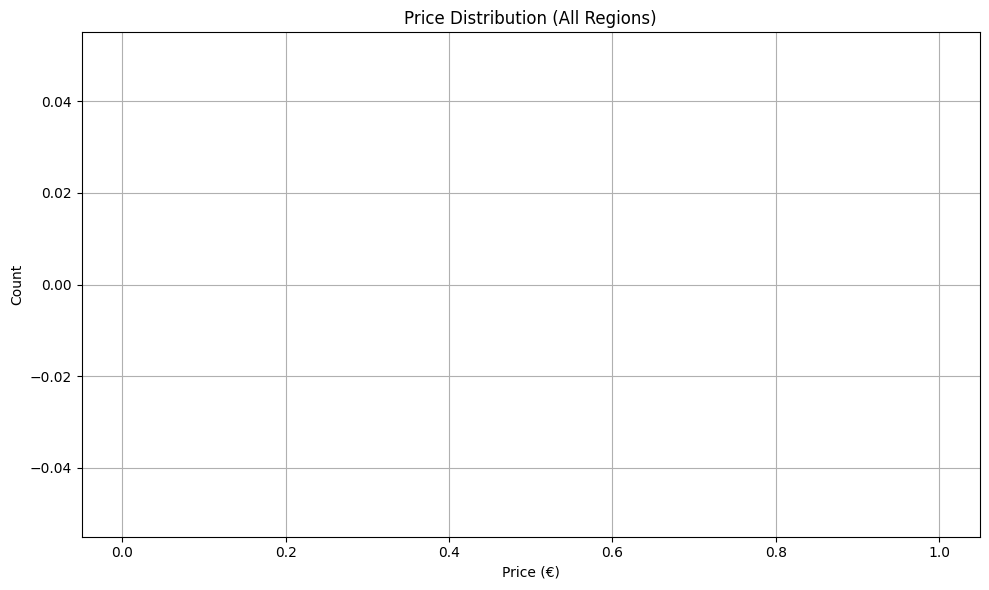

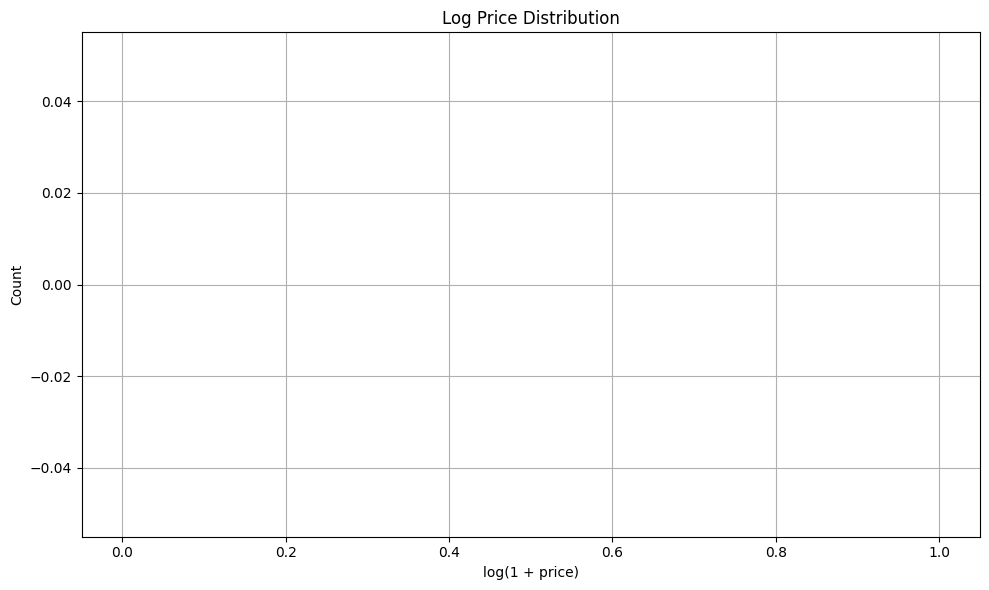

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df["price"].hist(bins=80)
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.title("Price Distribution (All Regions)")
plt.tight_layout()
plt.show()
# 
import numpy as np

plt.figure(figsize=(10,6))
np.log1p(df["price"]).hist(bins=80)
plt.xlabel("log(1 + price)")
plt.ylabel("Count")
plt.title("Log Price Distribution")
plt.tight_layout()
plt.show()


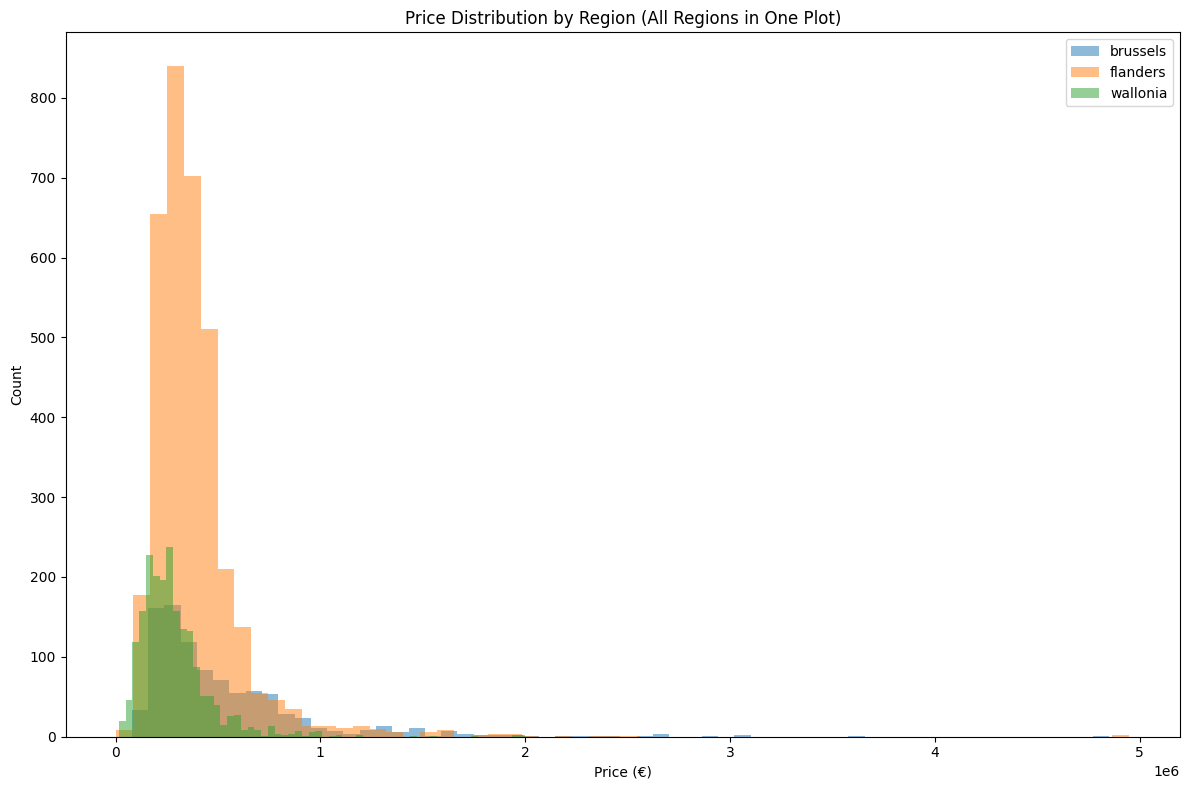

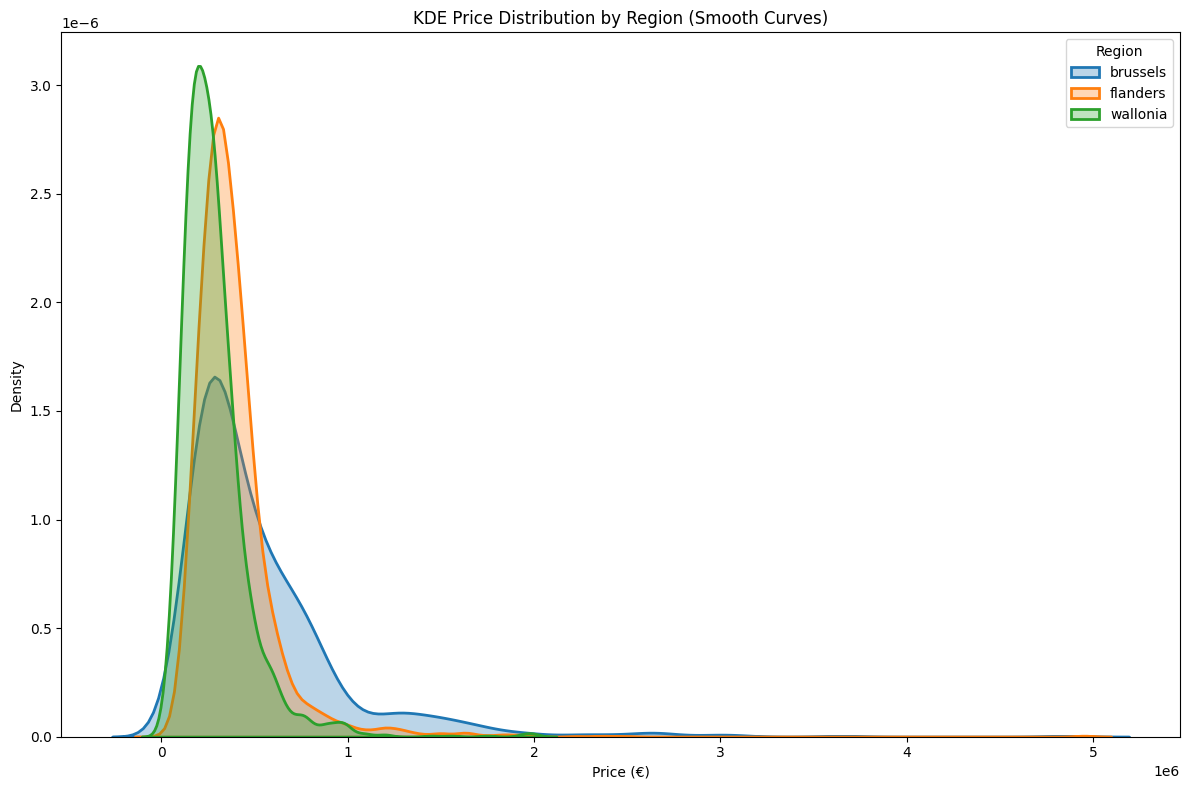

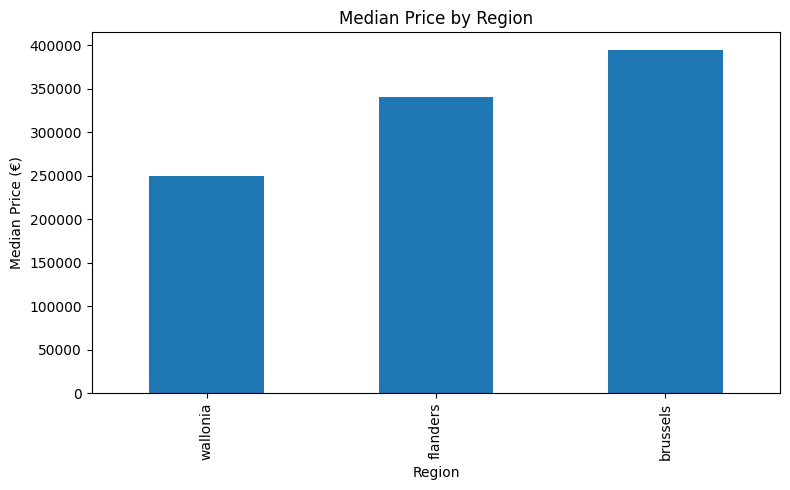

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df[df["price"].notna() & (df["price"] > 0)]


# Ensure price is numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Keep only valid prices
df_valid = df[df["price"].notna() & (df["price"] > 0)]

# Get regions with valid price data
regions = df_valid["region"].dropna().unique()

plt.figure(figsize=(12,8))

# Loop and plot all price distributions in one histogram
for region in regions:
    subset = df_valid[df_valid["region"] == region]["price"]
    if subset.dropna().empty:
        continue
    plt.hist(subset, bins=60, alpha=0.5, label=region)

plt.title("Price Distribution by Region (All Regions in One Plot)")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

#KDE


# Ensure price is numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Keep only valid positive prices
df_valid = df[df["price"].notna() & (df["price"] > 0)]

plt.figure(figsize=(12,8))

# Plot KDE for each region
for region in df_valid["region"].dropna().unique():
    sns.kdeplot(
        df_valid[df_valid["region"] == region]["price"],
        label=region,
        fill=True,
        alpha=0.3,
        linewidth=2
    )

plt.title("KDE Price Distribution by Region (Smooth Curves)")
plt.xlabel("Price (€)")
plt.ylabel("Density")
plt.legend(title="Region")
plt.tight_layout()
plt.show()

#by median
median_price = df.groupby("region")["price"].median().sort_values()

median_price.plot(kind="bar", figsize=(8,5))
plt.title("Median Price by Region")
plt.xlabel("Region")
plt.ylabel("Median Price (€)")
plt.tight_layout()
plt.show()




# <B> DELIVERABLES

## load the data and setting the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")  # clean default style
df = pd.read_csv("data.csv")   #loading the dataset
df.head()
df = df.copy()




## 1) How many observations and features/columns do you have?

In [3]:
# Number of rows (observations) and columns (features)
n_rows, n_cols = df.shape
print(f"Observations: {n_rows}, Features: {n_cols}")

# Quick structural overview
df.info()


Observations: 15230, Features: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15230 entries, 0 to 15229
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   build_year     6224 non-null   object 
 1   facades        10090 non-null  object 
 2   garden         15230 non-null  object 
 3   living_area    13502 non-null  object 
 4   locality_name  15010 non-null  object 
 5   number_rooms   13978 non-null  object 
 6   postal_code    15010 non-null  object 
 7   price          14389 non-null  float64
 8   property_id    15230 non-null  object 
 9   property_type  14234 non-null  object 
 10  property_url   15230 non-null  object 
 11  state          11114 non-null  object 
 12  swimming_pool  15230 non-null  object 
 13  terrace        13830 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.6+ MB


# 2) What is the proportion of missing values per column?

In [5]:
# missing count + percentage
missing_counts = df.isna().sum()
missing_pct = (df.isna().mean() * 100).round(2)

missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct
}).sort_values("missing_pct", ascending=False)

missing_summary



#




,missing_count,missing_pct
build_year,9006,59.13
facades,5140,33.75
state,4116,27.03
living_area,1728,11.35
terrace,1400,9.19
number_rooms,1252,8.22
property_type,996,6.54
price,841,5.52
postal_code,220,1.44
locality_name,220,1.44


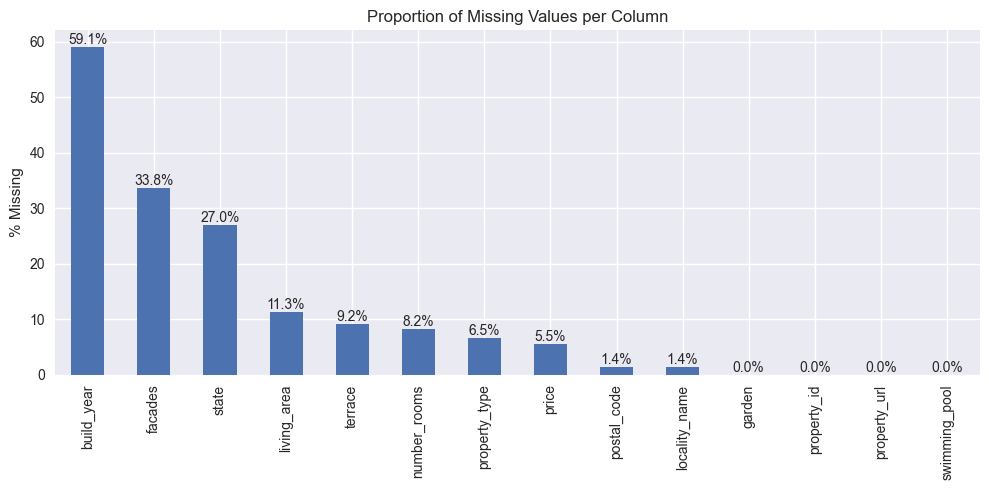

In [5]:
# Visualization missing values
ax = missing_summary["missing_pct"].plot(
    kind="bar",
    figsize=(10,5)
)

plt.ylabel("% Missing")
plt.title("Proportion of Missing Values per Column")
plt.tight_layout()

# Add percentage labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.1f}%",                               # format percentage
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.show()



<b> Remarks: While certain variables, like build_year, facades, and state, have significant missingness, others, like pricing and property_id  have relatively little incomplete data.

#  ----------------data cleaning -------------

In [ ]:
# Standardize and Clean Column Names :turn empty strings / “nan” / “none” into proper missing values (NaN)

df.columns = (
    df.columns.str.strip()                     # remove spaces at start/end
              .str.lower()                     # lowercase everything
              .str.replace(r"[^a-z0-9]+", "_", regex=True)  # non-alphanumeric -> "_"
              .str.strip("_")                  # remove "_" at start/end
)

text_cols = ["url", "property_id", "property_type", "locality_name", "state", "postal_code"]

for col in text_cols:
    if col in df.columns:
        df[col] = df[col].replace(["", "nan", "none", "NaN", "NULL"], np.nan)

# normalize numeric values

numeric_cols = ["living_area", "number_rooms", "build_year", "facades", "garden_area"]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")  # invalid -> NaN

  # Normalize Booleans (terrace, garden, pool)

bool_cols = ["terrace", "garden", "swimming_pool", "equipped_kitchen", "furnished"]
mapping = {"1": 1, "0": 0, "yes": 1, "no": 0, "true": 1, "false": 0}

for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().map(mapping)



# Remove Duplicates

print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())


# Remove leading/trailing spaces in text columns

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip()



#  Clean and convert the price column

import re

def parse_price(text):
    if pd.isna(text):
        return np.nan
    text = str(text).replace("\u202f", "")  # remove narrow non-breaking space
    nums = re.findall(r"\d+", text)        # extract all digit groups
    if not nums:
        return np.nan
    return float(max(int(n) for n in nums))  # take the largest number

df["price"] = df["price"].apply(parse_price)
df["price"].describe()




Duplicates before: 1
Duplicates after: 0


count    1.438900e+04
mean     3.885116e+05
std      2.729577e+05
min      1.000000e+00
25%      2.500000e+05
50%      3.295000e+05
75%      4.400000e+05
max      8.600002e+06
Name: price, dtype: float64

## Maping Postal Code into Province and Region

In [28]:
def postal_to_region(code):
    try:
        code_int = int(code)
    except (ValueError, TypeError):
        return "unknown"
    if 1000 <= code_int <= 1299:
        return "brussels"
    if (1300 <= code_int <= 1499) or (4000 <= code_int <= 7999):
        return "wallonia"
    if (1500 <= code_int <= 3990) or (8000 <= code_int <= 9992):
        return "flanders"
    return "unknown"

df["region"] = df["postal_code"].apply(postal_to_region)

# Province mapping (Belgium)
def postal_to_province(code):
    try:
        c = int(code)
    except:
        return "Unknown"
    if 1000 <= c <= 1299: return "Brussels"
    if 1300 <= c <= 1499: return "Walloon Brabant"
    if 1500 <= c <= 1999: return "Flemish Brabant"
    if 2000 <= c <= 2999: return "Antwerp"
    if 3000 <= c <= 3499: return "Flemish Brabant"
    if 3500 <= c <= 3999: return "Limburg"
    if 4000 <= c <= 4999: return "Liège"
    if 5000 <= c <= 5699: return "Namur"
    if 6000 <= c <= 6599: return "Hainaut"
    if 6600 <= c <= 6999: return "Luxembourg"
    if 7000 <= c <= 7999: return "Hainaut"
    if 8000 <= c <= 8999: return "West Flanders"
    if 9000 <= c <= 9999: return "East Flanders"
    return "Unknown"
df["province"] = df["postal_code"].apply(postal_to_province)



# reate price_per_m2 

if "price" in df.columns and "living_area" in df.columns:
    mask = df["price"].notna() & df["living_area"].notna() & (df["living_area"] > 0)
    df.loc[mask, "price_per_m2"] = df.loc[mask, "price"] / df.loc[mask, "living_area"]

    cols_to_drop = []

for col in ["property_id", "property_url"]:
    if col in df.columns:
        cols_to_drop.append(col)



print("Columns considered to drop:", cols_to_drop)

df_analysis = df.drop(columns=cols_to_drop, errors="ignore")
df_analysis.info()










Columns considered to drop: ['property_id', 'property_url']
<class 'pandas.core.frame.DataFrame'>
Index: 15229 entries, 0 to 15229
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   build_year     6222 non-null   float64
 1   facades        10088 non-null  float64
 2   garden         15228 non-null  float64
 3   living_area    13500 non-null  float64
 4   locality_name  15229 non-null  object 
 5   number_rooms   13976 non-null  float64
 6   postal_code    15229 non-null  object 
 7   price          14389 non-null  float64
 8   property_type  15229 non-null  object 
 9   state          15229 non-null  object 
 10  swimming_pool  15228 non-null  float64
 11  terrace        13828 non-null  float64
 12  region         15229 non-null  object 
 13  province       15229 non-null  object 
 14  price_per_m2   12898 non-null  float64
dtypes: float64(9), object(6)
memory usage: 1.9+ MB


# 3) Which variables would you delete and why?

#### URL , property_id(postal_code???) because they are identifiers,not explanatory variables. they are unique and useful for tracking but not for the price.  inaddition we want to remove furnished, equipped_kitchen and garden_area due to their relevance and mostly missing data

In [8]:
# Columns where almost all values are unique 
high_card = df.nunique().sort_values(ascending=False)
high_card

# Columns with (almost) constant values
low_var = df.nunique().sort_values()
low_var

garden               2
terrace              2
swimming_pool        2
facades              4
region               4
state               11
province            12
property_type       24
number_rooms        27
build_year         181
living_area        566
postal_code        855
locality_name     1373
price             2336
property_url     15229
property_id      15229
dtype: int64

 # 4) What variables are most subject to outliers?

In [10]:
# numeric summary + IQR outlier flag

# Select only numeric columns
num_cols = df.select_dtypes(include=["number"]).columns

outlier_counts = {}

for col in num_cols:
    series = df[col].dropna()
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = series[(series < lower) | (series > upper)]
    outlier_counts[col] = len(outliers)

outlier_counts







{'build_year': 167,
 'facades': 0,
 'garden': 0,
 'living_area': 773,
 'number_rooms': 1170,
 'price': 972,
 'swimming_pool': 373,
 'terrace': 2411}

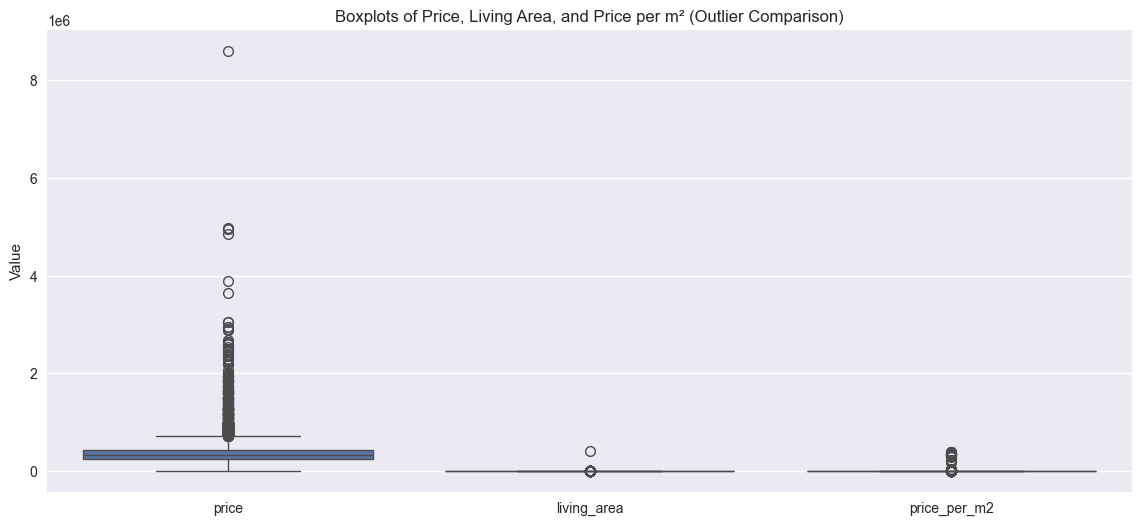

In [15]:
# boxplots

# Make a safe working copy
df_plot = df.copy()

# Compute price per m² safely
df_plot["price_per_m2"] = df_plot["price"] / df_plot["living_area"]

# Select variables for outlier comparison
cols = ["price", "living_area", "price_per_m2"]

plt.figure(figsize=(14,6))

sns.boxplot(data=df_plot[cols])
plt.title("Boxplots of Price, Living Area, and Price per m² (Outlier Comparison)")
plt.ylabel("Value")

plt.show()






<b>          Which variables have few or no outliers?

- Facades (0–4 typical range)

- Terrace, garden, swimming_pool, furnished, equipped_kitchen (binary variables)

- These do not produce outliers because their range is fixed.

# 5. How many qualitative and quantitative variables? Visuals and correlation measures?

In [16]:
quantitative = df.select_dtypes(include=[np.number]).columns.tolist()
qualitative = df.select_dtypes(include=["object"]).columns.tolist()

print("Quantitative:", quantitative)
print("Qualitative:", qualitative)
print(f"# Quantitative: {len(quantitative)}, # Qualitative: {len(qualitative)}")


Quantitative: ['build_year', 'facades', 'garden', 'living_area', 'number_rooms', 'price', 'swimming_pool', 'terrace', 'price_per_m2']
Qualitative: ['locality_name', 'postal_code', 'property_id', 'property_type', 'property_url', 'state', 'region', 'province']
# Quantitative: 9, # Qualitative: 8


# 6. What is the correlation between variables and price?

In [26]:
num_cols = df.select_dtypes(include=[np.number]).columns
corr_with_price = df[num_cols].corr()["price"].sort_values(ascending=False)
corr_with_price


price            1.000000
number_rooms     0.457452
swimming_pool    0.272841
facades          0.236614
garden           0.192683
terrace          0.134922
price_per_m2     0.024957
living_area      0.018363
build_year       0.015536
Name: price, dtype: float64

Quantitative variables: ['build_year', 'facades', 'garden', 'living_area', 'number_rooms', 'price', 'swimming_pool', 'terrace', 'price_per_m2']
Qualitative variables: ['locality_name', 'postal_code', 'property_type', 'state', 'region', 'province', 'living_area_bin']
Number of quantitative: 9
Number of qualitative: 7


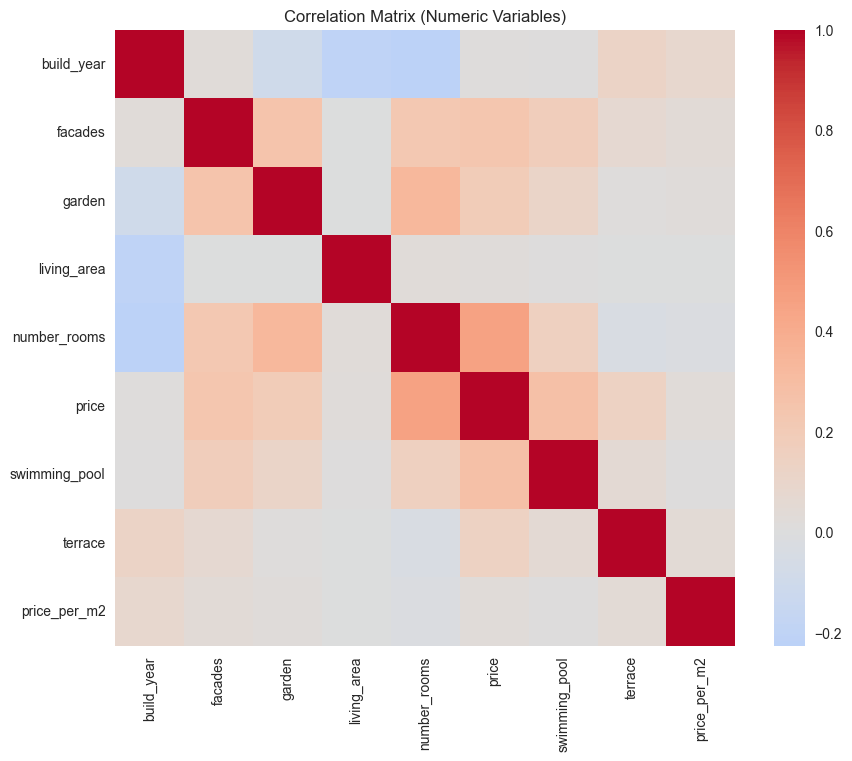

price            1.000000
number_rooms     0.457452
swimming_pool    0.272841
facades          0.236614
garden           0.192683
terrace          0.134922
price_per_m2     0.024957
living_area      0.018363
build_year       0.015536
Name: price, dtype: float64


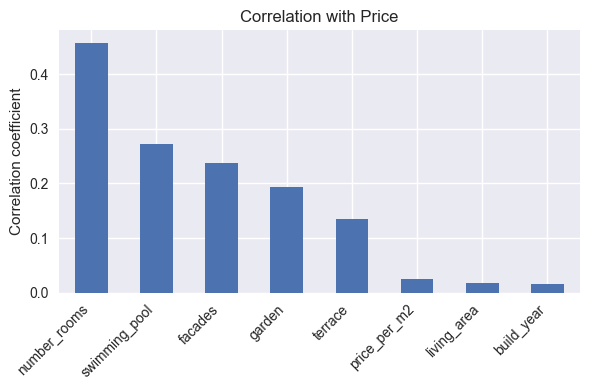

In [36]:
quantitative_cols = df_analysis.select_dtypes(include=[np.number]).columns.tolist()
qualitative_cols = df_analysis.select_dtypes(exclude=[np.number]).columns.tolist()

print("Quantitative variables:", quantitative_cols)
print("Qualitative variables:", qualitative_cols)
print("Number of quantitative:", len(quantitative_cols))
print("Number of qualitative:", len(qualitative_cols))




corr_matrix = df_analysis[quantitative_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Numeric Variables)")
plt.show()





if "price" in df_analysis.columns:
    corr_with_price = corr_matrix["price"].sort_values(ascending=False)
    print(corr_with_price)

    plt.figure(figsize=(6,4))
    corr_with_price.drop("price").plot(kind="bar")
    plt.title("Correlation with Price")
    plt.ylabel("Correlation coefficient")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


<b> Larger properties are typically more expensive, as seen by the significant correlation between price and living area and number of rooms. Geographical factors like postal code and location can have a big impact on prices. Because they are less common and frequently found in particular house types and upscale properties, things like gardens, terraces, and pools have a favorable but more limited impact. 


<b> We find that the number of rooms and living area have a high correlation, establishing a size-related group of variables that together represent the property's physical volume. Price per square meter and location factors also frequently correlate, particularly within a given region. Another minor correlation group that is typical of higher-end residences is formed by the likelihood of amenities like a garden, terrace, and swimming pool to co-occur.

### catagorical variables

In [10]:
df.groupby("region")["price"].median()
df.groupby("property_type")["price"].median()
df.groupby("state")["price"].median()


state
Excellent             415000.0
Fully renovated       319000.0
New                   345000.0
Normal                319000.0
To be renovated       250000.0
To demolish           339000.0
To renovate           275000.0
To restore            215000.0
Under construction    332500.0
nan                   319700.0
state                      NaN
Name: price, dtype: float64

# Anaysis by municipality

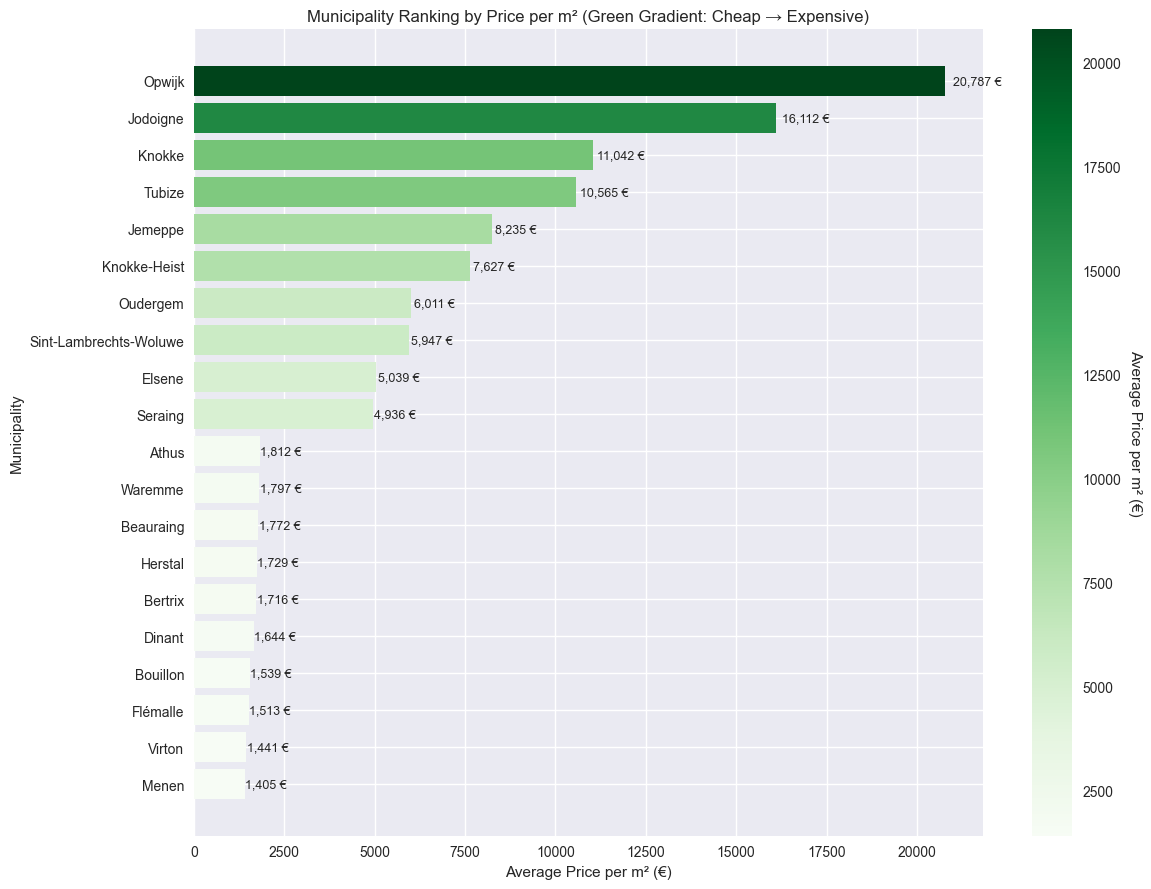

In [52]:
# === region and Municipality price ranking ===
# Create region variable

def postal_to_region(code):
    try:
        c = int(code)
    except:
        return "unknown"
    if 1000 <= c <= 1299:
        return "brussels"
    if (1300 <= c <= 1499) or (4000 <= c <= 7999):
        return "wallonia"
    if (1500 <= c <= 3990) or (8000 <= c <= 9992):
        return "flanders"
    return "unknown"

df["region"] = df["postal_code"].apply(postal_to_region)

# Group by municipality
muni_stats = (
    df.groupby(["locality_name", "region"], as_index=False, dropna=True)
      .agg(
          avg_price=("price", "mean"),
          median_price=("price", "median"),
          avg_m2=("price_per_m2", "mean"),
          count=("price", "count")
      )
)

# Filter only municipalities with enough listings (≥ 20)
muni_stats = muni_stats[muni_stats["count"] >= 20].copy()

# Top expensive per m²
top_m2 = muni_stats.sort_values("avg_m2", ascending=False).head(10)

# Cheap per m²
low_m2 = muni_stats.sort_values("avg_m2", ascending=True).head(10)

top_m2, low_m2


# Combine
plot_df = pd.concat([low_m2, top_m2], ignore_index=True)
plot_df = plot_df.sort_values("avg_m2", ascending=True)
plot_df["label"] = plot_df["locality_name"]

# Normalize 0–1 for gradient
norm = (plot_df["avg_m2"] - plot_df["avg_m2"].min()) / (plot_df["avg_m2"].max() - plot_df["avg_m2"].min())
colors = plt.cm.Greens(norm)

# Create figure + axis explicitly
fig, ax = plt.subplots(figsize=(12, 9))

bars = ax.barh(
    y=plot_df["label"],
    width=plot_df["avg_m2"],
    color=colors
)

ax.set_title("Municipality Ranking by Price per m² (Green Gradient: Cheap → Expensive)")
ax.set_xlabel("Average Price per m² (€)")
ax.set_ylabel("Municipality")

# Numeric labels
for bar in bars:
    v = bar.get_width()
    ax.text(
        v + (v * 0.01),
        bar.get_y() + bar.get_height() / 2,
        f"{v:,.0f} €",
        va="center",
        fontsize=9
    )

# Proper colorbar linking
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

norm_obj = Normalize(vmin=plot_df["avg_m2"].min(), vmax=plot_df["avg_m2"].max())
sm = ScalarMappable(norm=norm_obj, cmap="Greens")
sm.set_array([])  # required for colorbar

# Attach colorbar to the correct axis
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Average Price per m² (€)", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()






# Least/most expensive municipalities (Belgium/regions)

Most expensive municipalities (by mean price per m²):
                     mean_price  median_price  mean_price_m2  median_price_m2  \
locality_name                                                                   
Hélécine          325066.666667      349175.0  120091.739544      3107.396945   
Rekkem            297600.000000      319000.0   69585.611881      2140.939597   
Londerzeel        400175.000000      343525.0   63798.017602      2183.032424   
Wortegem-Petegem  761765.000000      350525.0   62613.986169      3074.751182   
Lembeek           247578.571429      249000.0   53261.797562      2107.142857   
Dendermonde       368421.428571      345050.0   51059.293337      2146.739130   
Galmaarden        387578.571429      429000.0   50776.973470      2471.264368   
Roosdaal          468650.000000      449000.0   50467.973712      2737.588652   
Herve             532666.666667      547500.0   39096.637561      2456.025641   
Recht             317857.142857      329000.0   36684.6

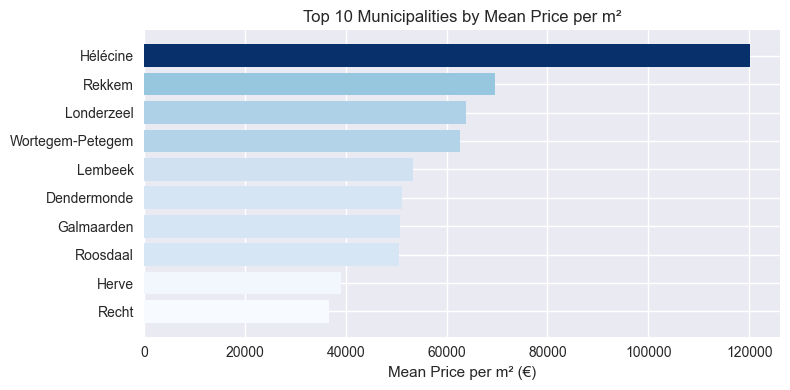

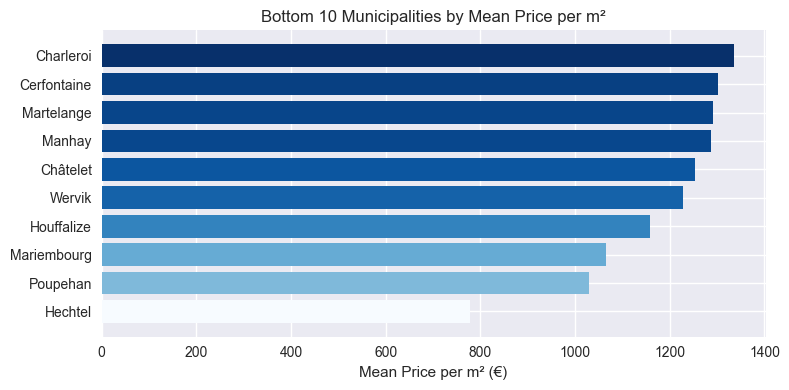

In [56]:


if {"price", "living_area", "locality_name"}.issubset(df_analysis.columns):
    mask = df_analysis["price_per_m2"].notna()
    df_ppm2 = df_analysis[mask].copy()

    agg = df_ppm2.groupby("locality_name").agg(
        mean_price=("price", "mean"),
        median_price=("price", "median"),
        mean_price_m2=("price_per_m2", "mean"),
        median_price_m2=("price_per_m2", "median"),
        n=("price", "size")
    )

    # Restrict to municipalities with enough data
    agg = agg[agg["n"] >= 5]

    # Top & bottom 10
    top10 = agg.sort_values("mean_price_m2", ascending=False).head(10)
    bottom10 = agg.sort_values("mean_price_m2", ascending=True).head(10)

    # Print results
    print("Most expensive municipalities (by mean price per m²):")
    print(top10)
    print("\nLeast expensive municipalities (by mean price per m²):")
    print(bottom10)

    # ----------------------------------
    # 1. TOP 10 (light blue gradient)
    # ----------------------------------
    top_sorted = top10["mean_price_m2"].sort_values()
    norm = (top_sorted - top_sorted.min()) / (top_sorted.max() - top_sorted.min())
    colors_top = plt.cm.Blues(norm)   # Light-blue gradient

    plt.figure(figsize=(8,4))
    plt.barh(top_sorted.index, top_sorted.values, color=colors_top)
    plt.title("Top 10 Municipalities by Mean Price per m²")
    plt.xlabel("Mean Price per m² (€)")
    plt.tight_layout()
    plt.show()

    # ----------------------------------
    # 2. BOTTOM 10 (light blue gradient)
    # ----------------------------------
    bottom_sorted = bottom10["mean_price_m2"].sort_values()
    norm2 = (bottom_sorted - bottom_sorted.min()) / (bottom_sorted.max() - bottom_sorted.min())
    colors_bottom = plt.cm.Blues(norm2)

    plt.figure(figsize=(8,4))
    plt.barh(bottom_sorted.index, bottom_sorted.values, color=colors_bottom)
    plt.title("Bottom 10 Municipalities by Mean Price per m²")
    plt.xlabel("Mean Price per m² (€)")
    plt.tight_layout()
    plt.show()


## by provinces and region

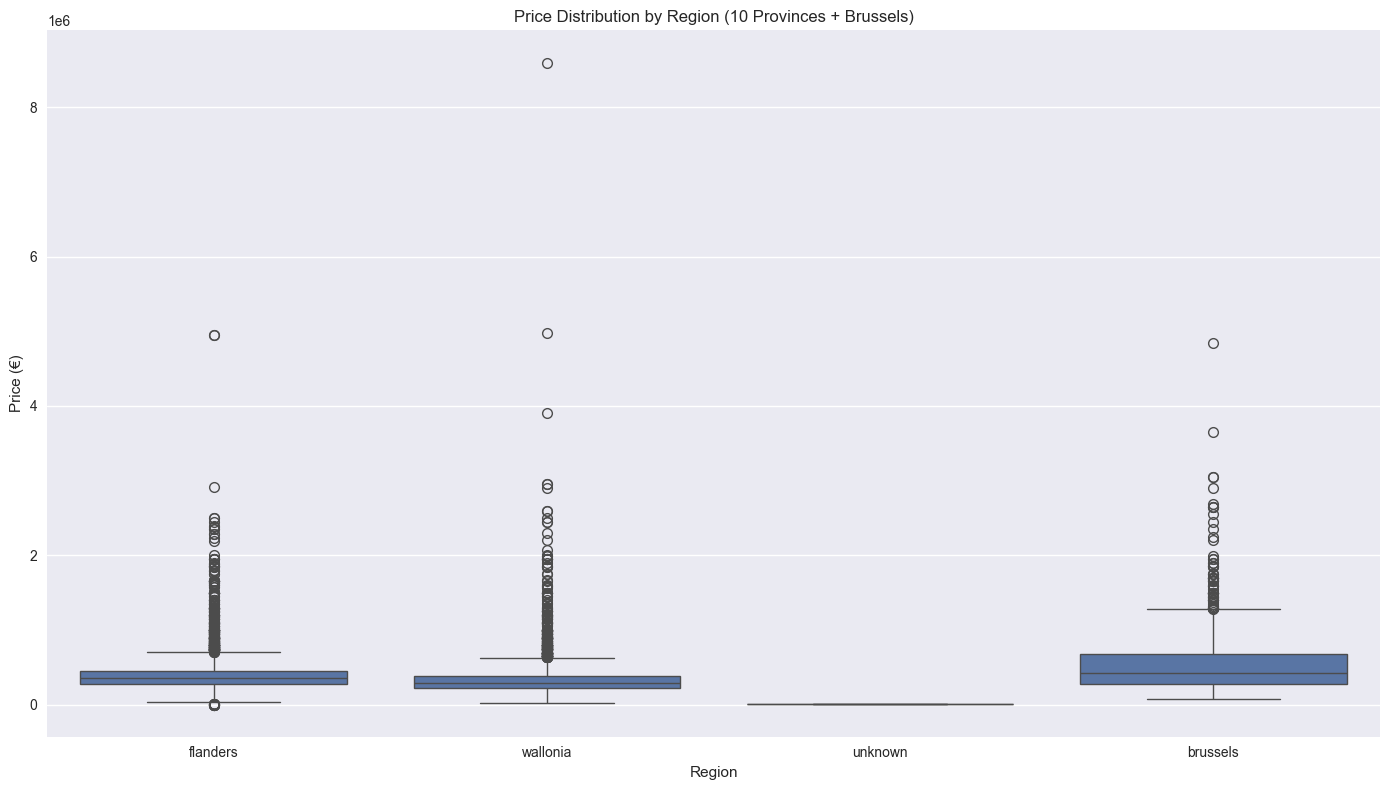

In [53]:
# PRICE DISTRIBUTION FOR 10 PROVINCES + BRUSSELS
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="region", y="price")
plt.title("Price Distribution by Region (10 Provinces + Brussels)")
plt.xlabel("Region")
plt.ylabel("Price (€)")
plt.tight_layout()
plt.show()

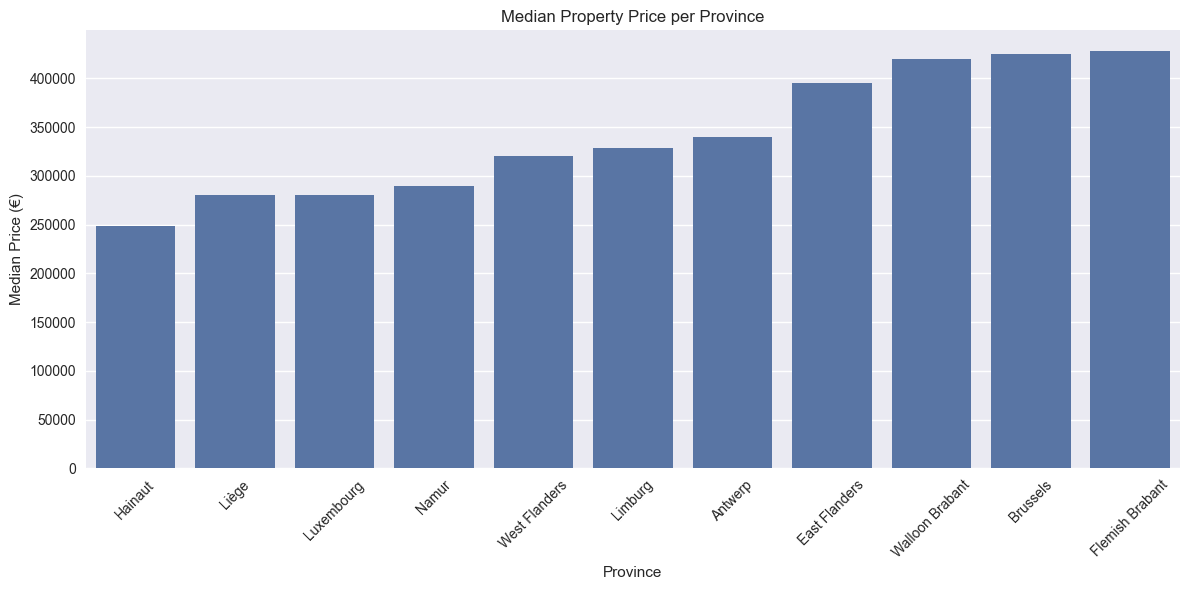

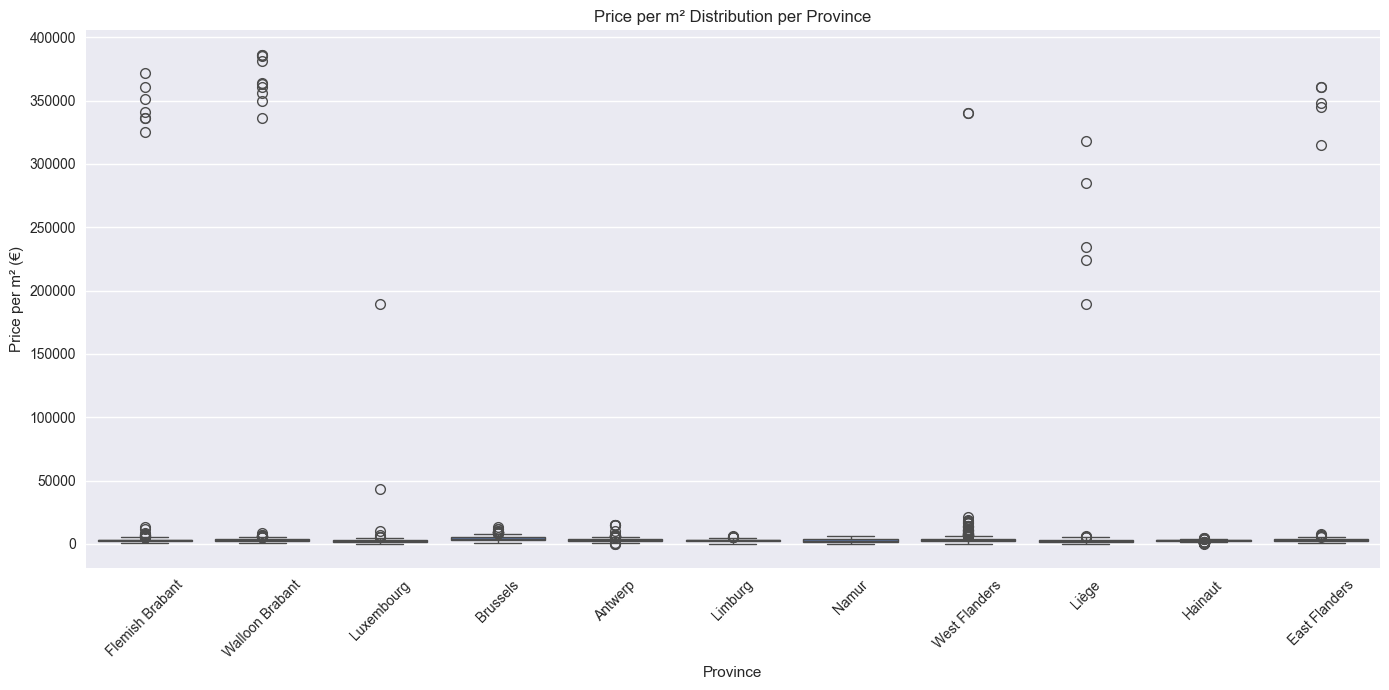

In [24]:
# Filter valid province
df_valid = df[df["province"] != "Unknown"].copy()

# -----------------------------
# D: Median price per province
# -----------------------------
median_prices = df_valid.groupby("province")["price"].median().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=median_prices.index, y=median_prices.values)
plt.title("Median Property Price per Province")
plt.ylabel("Median Price (€)")
plt.xlabel("Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------
# E: Price per m² distribution per province (boxplot)
# -----------------------------
plt.figure(figsize=(14,7))
sns.boxplot(data=df_valid, x="province", y="price_per_m2")
plt.title("Price per m² Distribution per Province")
plt.ylabel("Price per m² (€)")
plt.xlabel("Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Price vs living area (scatterplot, log scales)


living_area_bin
0–50         374
50–100      4477
100–150     3924
150–200     2421
200–300     1522
300–500      589
500–1000     167
Name: count, dtype: int64


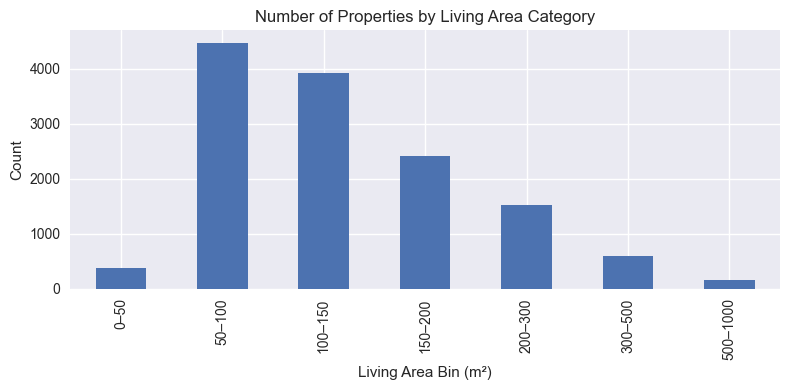

In [29]:
if "living_area" in df_analysis.columns:
    bins = [0, 50, 100, 150, 200, 300, 500, 1000]
    labels = ["0–50", "50–100", "100–150", "150–200", "200–300", "300–500", "500–1000"]

    df_analysis["living_area_bin"] = pd.cut(df_analysis["living_area"], bins=bins, labels=labels)

    surface_counts = df_analysis["living_area_bin"].value_counts().sort_index()
    print(surface_counts)

    plt.figure(figsize=(8,4))
    surface_counts.plot(kind="bar")
    plt.title("Number of Properties by Living Area Category")
    plt.xlabel("Living Area Bin (m²)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


# property type

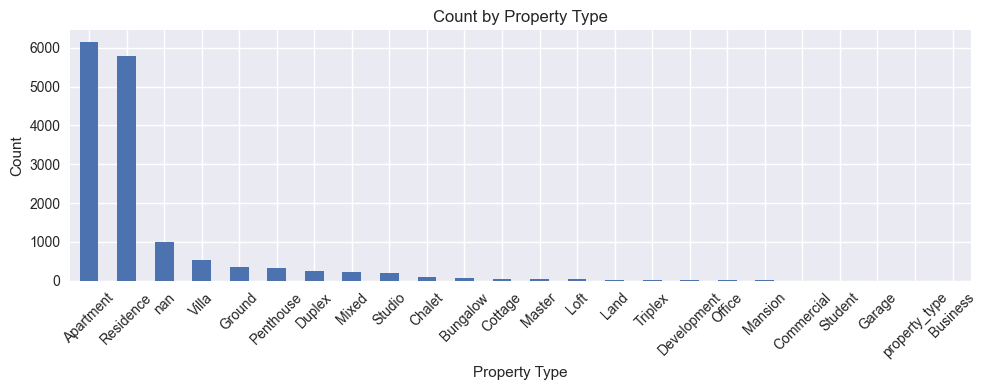

In [32]:
if "property_type" in df_analysis.columns:
    plt.figure(figsize=(10,4))
    df_analysis["property_type"].value_counts().plot(kind="bar")
    plt.title("Count by Property Type")
    plt.ylabel("Count")
    plt.xlabel("Property Type")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#Price vs living area (scatterplot, log scales)


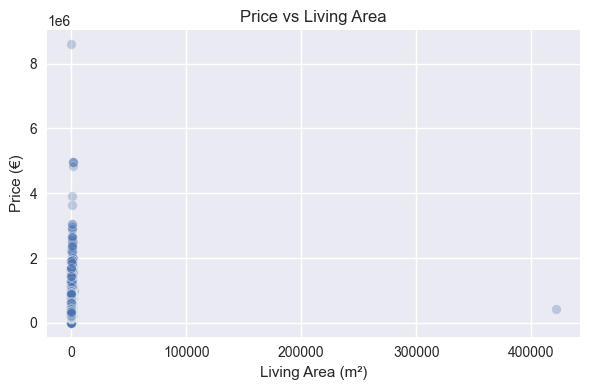

In [41]:
if {"price", "living_area"}.issubset(df_analysis.columns):
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df_analysis, x="living_area", y="price", alpha=0.3)
    plt.title("Price vs Living Area")
    plt.xlabel("Living Area (m²)")
    plt.ylabel("Price (€)")
    plt.tight_layout()
    plt.show()


    

## Price by property_type

property_type
Garage             32475.0
Chalet            129500.0
Land              129500.0
Development       155000.0
Student           172975.0
Studio            183000.0
Business          199000.0
Office            234600.0
Commercial        280320.0
Ground            295000.0
Apartment         299000.0
Bungalow          310000.0
nan               315000.0
Duplex            319574.0
Cottage           320000.0
Loft              355500.0
Residence         370000.0
Mixed             375000.0
Triplex           437500.0
Penthouse         460000.0
Master            482500.0
Villa             639000.0
Mansion          1725000.0
property_type          NaN
Name: price, dtype: float64


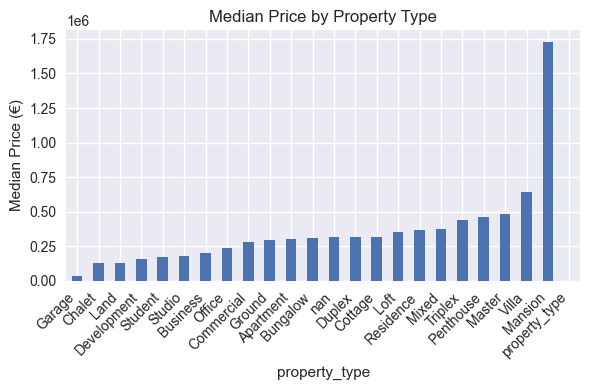

In [48]:
if {"price", "property_type"}.issubset(df_analysis.columns):
    type_price = df_analysis.groupby("property_type")["price"].median().sort_values()
    print(type_price)

    plt.figure(figsize=(6,4))
    type_price.plot(kind="bar")
    plt.title("Median Price by Property Type")
    plt.ylabel("Median Price (€)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


## price by state 

state
To restore            215000.0
To be renovated       250000.0
To renovate           275000.0
Fully renovated       319000.0
Normal                319000.0
nan                   319700.0
Under construction    332500.0
To demolish           339000.0
New                   345000.0
Excellent             415000.0
state                      NaN
Name: price, dtype: float64


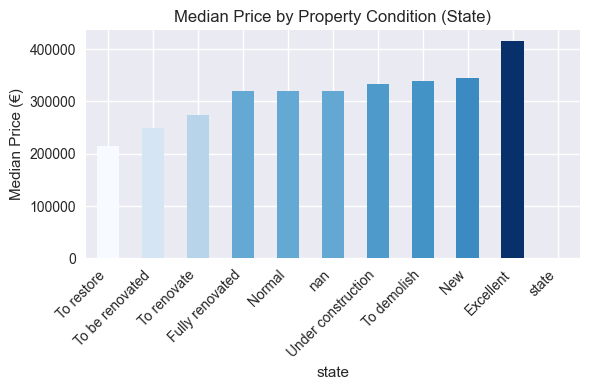

In [55]:
import matplotlib.pyplot as plt
import numpy as np

if {"price", "state"}.issubset(df_analysis.columns):

    state_price = df_analysis.groupby("state")["price"].median().sort_values()
    print(state_price)

    # Normalized values for gradient
    norm = (state_price - state_price.min()) / (state_price.max() - state_price.min())

    colors = plt.cm.Blues(norm)   # Blue gradient (change to Greens, Reds, etc.)

    plt.figure(figsize=(6,4))
    state_price.plot(kind="bar", color=colors)

    plt.title("Median Price by Property Condition (State)")
    plt.ylabel("Median Price (€)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
